In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import json


In [63]:
with open("metrics_random.json", "r") as f:
    metrics_random = json.load(f)
metrics_random = {k: [dic[k] for dic in metrics_random] for k in metrics_random[0].keys()}

In [64]:
df = pd.DataFrame(metrics_random)
# df = (df-df.mean())/df.std()

In [65]:
df

,GFLOPs (@1GHz),Utilization %,Cycles,Energy (uJ),EDP(J*cycle),Area (mm^2),Total Energy (fJ/Compute),fitness
0,-0.409965,0.142998,-0.269373,-1.371309,-0.410573,NaN,-1.371332,1.371332
1,0.544170,-0.985102,-0.350527,-0.813112,-0.454974,NaN,-0.813118,0.813118
2,-0.409965,-0.402868,-0.269373,-1.230938,-0.401477,NaN,-1.230957,1.230957
3,-0.918829,0.227856,0.769401,0.753999,1.558861,NaN,0.754012,-0.754012
4,-0.696173,0.906712,-0.139526,0.104724,-0.128359,NaN,0.104713,-0.104713
...,...,...,...,...,...,...,...,...
95,0.019387,-0.589340,-0.325022,0.994219,-0.363357,NaN,0.994210,-0.994210
96,2.270167,-0.702363,-0.376366,0.187884,-0.469052,NaN,0.187881,-0.187881
97,-0.886992,1.416211,0.379861,0.985042,0.961078,NaN,0.985032,-0.985032
98,-0.791603,0.227856,-0.009679,-0.508290,-0.059051,NaN,-0.508278,0.508278


In [68]:
df

,GFLOPs (@1GHz),Utilization %,Cycles,Energy (uJ),EDP(J*cycle),Area (mm^2),Total Energy (fJ/Compute),fitness
0,-0.409965,0.142998,-0.269373,-1.371309,-0.410573,NaN,-1.371332,1.371332
1,0.544170,-0.985102,-0.350527,-0.813112,-0.454974,NaN,-0.813118,0.813118
2,-0.409965,-0.402868,-0.269373,-1.230938,-0.401477,NaN,-1.230957,1.230957
3,-0.918829,0.227856,0.769401,0.753999,1.558861,NaN,0.754012,-0.754012
4,-0.696173,0.906712,-0.139526,0.104724,-0.128359,NaN,0.104713,-0.104713
...,...,...,...,...,...,...,...,...
95,0.019387,-0.589340,-0.325022,0.994219,-0.363357,NaN,0.994210,-0.994210
96,2.270167,-0.702363,-0.376366,0.187884,-0.469052,NaN,0.187881,-0.187881
97,-0.886992,1.416211,0.379861,0.985042,0.961078,NaN,0.985032,-0.985032
98,-0.791603,0.227856,-0.009679,-0.508290,-0.059051,NaN,-0.508278,0.508278


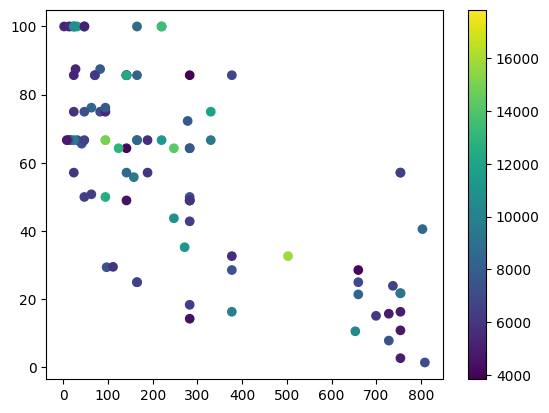

In [51]:
plt.scatter(metrics_random['GFLOPs (@1GHz)'], metrics_random['Utilization %'], c=metrics_random['Total Energy (fJ/Compute)'])
plt.colorbar()

GFLOPs (@1GHz)


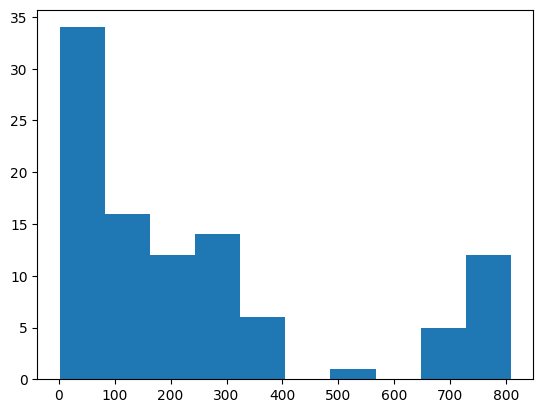

Utilization %


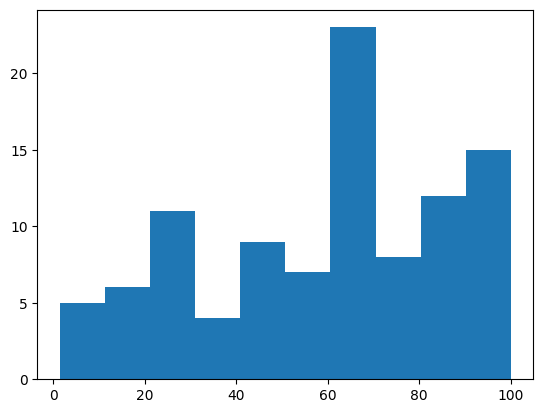

Cycles


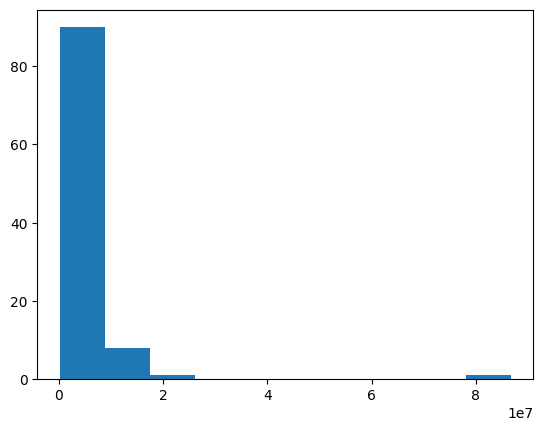

Energy (uJ)


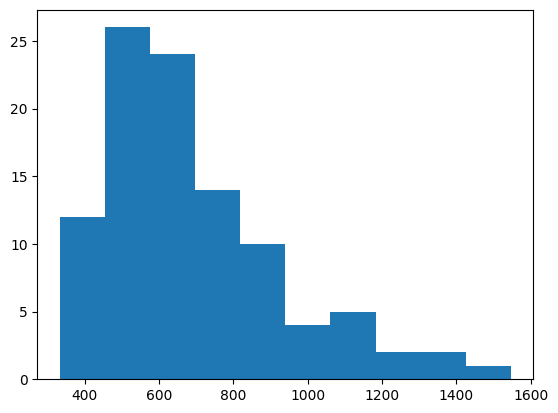

EDP(J*cycle)


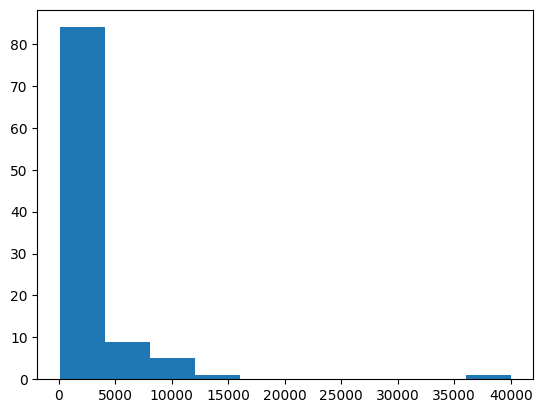

Area (mm^2)


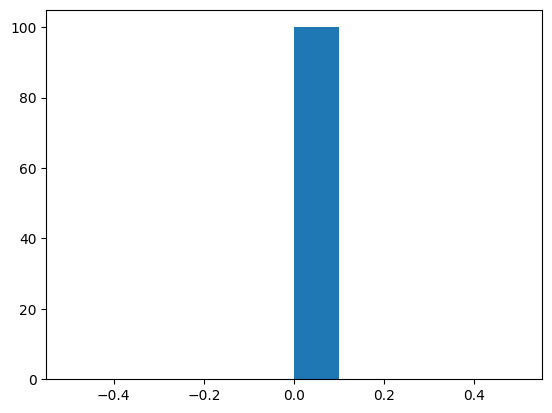

Total Energy (fJ/Compute)


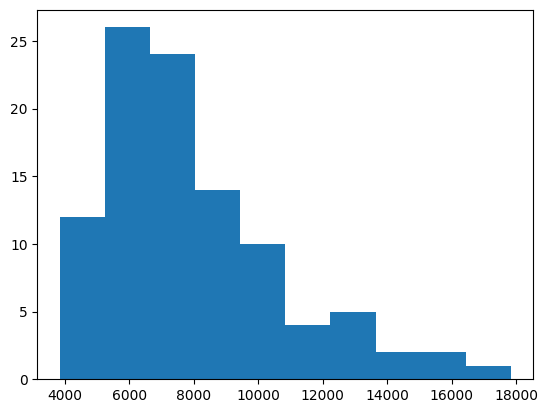

fitness


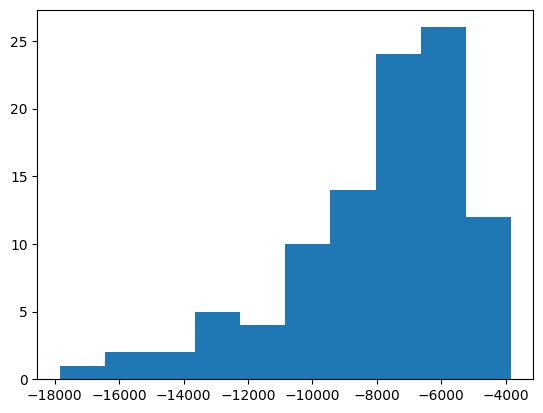

In [15]:
for k, v in metrics_random.items():
    print(k)
    plt.hist(v)
    plt.show()

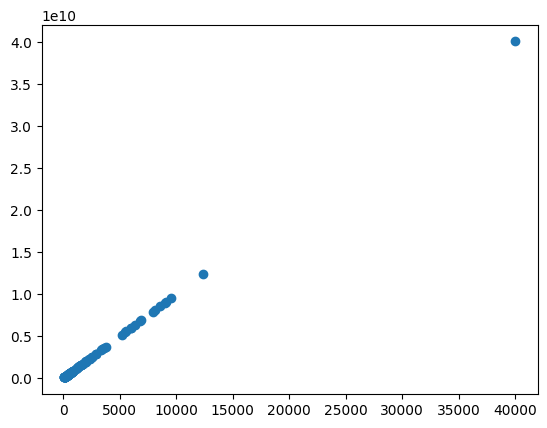

In [38]:
plt.scatter(metrics_random['EDP(J*cycle)'], np.array(metrics_random['Energy (uJ)'])*np.array(metrics_random['Cycles']))

In [357]:
import pickle

In [358]:
with open("ga_history.pkl", "rb") as f:
# with open("ga_history_nonfixed.pkl", "rb") as f:
    data = pickle.load(f)
metrics = data['metrics_history'][:80]
metrics = [i for gen in metrics for i in gen]
population = data['population_history'][:80]
population = [i for gen in population for i in gen]
df_pop = pd.DataFrame(population)

df = pd.DataFrame(metrics)
df = df.ewm(span=1).mean()

In [359]:
def plot_metric(df, metric, c='g'):
    mean = df[metric].to_numpy().reshape(-1, 8).mean(axis=-1)
    std = df[metric].to_numpy().reshape(-1, 8).std(axis=-1)
    std = std/np.sqrt(8)
    x = np.arange(len(mean))
    plt.plot(x, mean, c=c)
    plt.fill_between(x, mean-std, mean+std, color=c, alpha=0.3)
    plt.ylabel(metric, fontsize=30)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    # plt.xlabel("Iterations/Generations of Genetic Algorithm", fontsize=15)

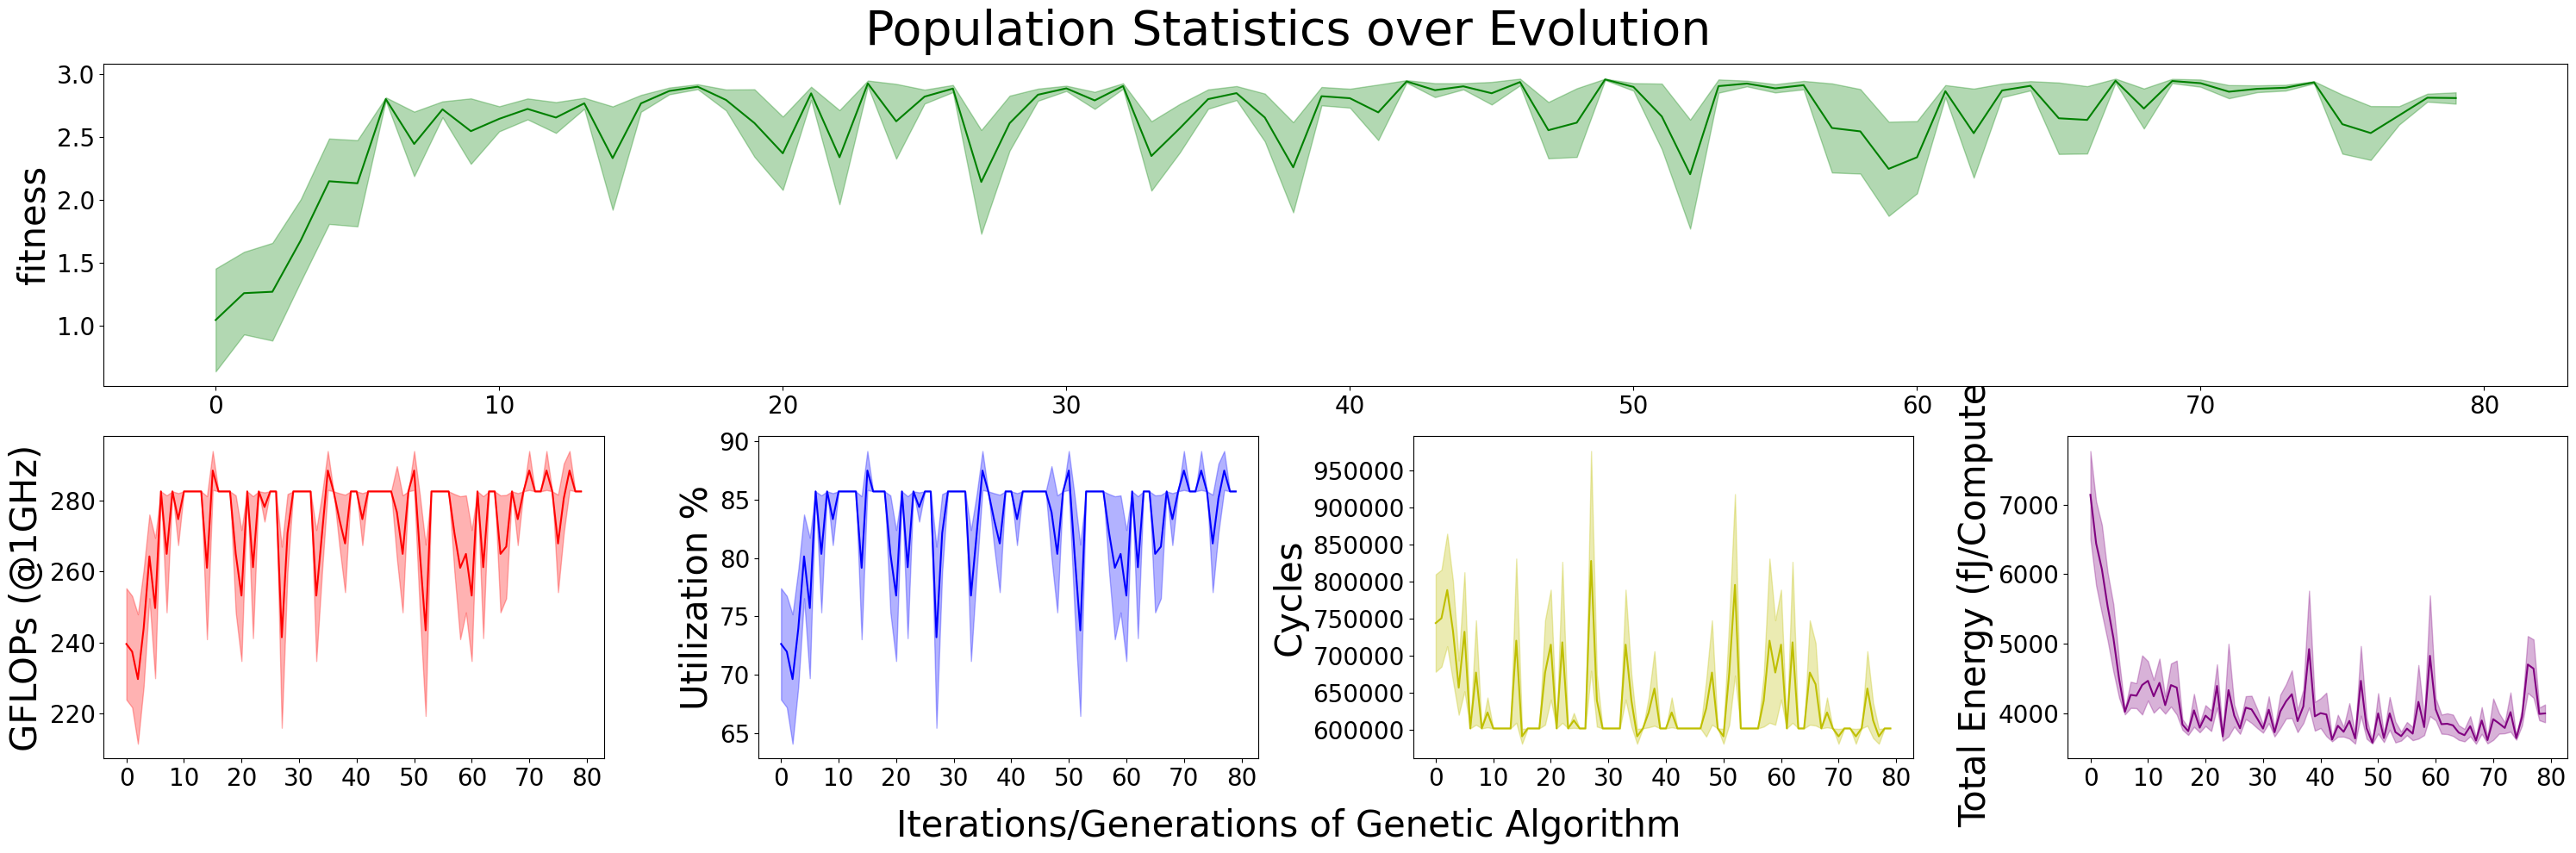

In [360]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(30, 10))
gs = axs[0, 0].get_gridspec()
for ax in axs[0, :]:
    ax.remove()
ax_big = fig.add_subplot(gs[0, :])
plt.sca(ax_big)
plot_metric(df, "fitness", c='g')

metrics = ['GFLOPs (@1GHz)', 'Utilization %', 'Cycles', 'Total Energy (fJ/Compute)']
cs = ['r', 'b', 'y', 'purple']
for i, (metric, c) in enumerate(zip(metrics, cs)):
    plt.sca(axs[1, i])
    plot_metric(df, metric, c=c)
fig.supxlabel("Iterations/Generations of Genetic Algorithm", fontsize=30)
plt.suptitle("Population Statistics over Evolution", fontsize=40)

# Display the plots
plt.tight_layout()
plt.show()


In [364]:
idx_best = df['fitness'].argmax()

In [365]:
print(df.loc[idx_best])

GFLOPs (@1GHz)                  282.670000
Utilization %                    85.710000
Cycles                       602112.000000
Energy (uJ)                     305.380000
EDP(J*cycle)                    184.000000
Area (mm^2)                       0.000000
Total Energy (fJ/Compute)      3522.140000
fitness                           2.975302
Name: 564, dtype: float64


In [366]:
df_pop.loc[idx_best]

shared_glb/attributes/depth      512
shared_glb/attributes/width      512
PE_column/spatial/meshX            4
PE/spatial/meshY                   2
ifmap_spad/attributes/depth        6
ifmap_spad/attributes/width       64
weights_spad/attributes/depth     48
weights_spad/attributes/width     64
psum_spad/attributes/depth         8
psum_spad/attributes/width       128
Name: 564, dtype: int64

In [322]:
3522.140000

3522.14

In [315]:
3617.910000

3617.91